<a href="https://colab.research.google.com/github/brianhphillips/testrepo/blob/main/CatBoost_RetailInventory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Step 1: Import Required Libraries
!pip install catboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor, Pool, cv, CatBoost
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atomicd/retail-store-inventory-and-demand-forecasting")

print("Path to dataset files:", path)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.4 MB/s eta 0:00:00
Path to dataset files: /kaggle/input/retail-store-inventory-and-demand-forecasting


In [3]:
# Step 2: Load the Dataset
# Replace this with the path to your local CSV file if you've downloaded it
csv_file = f"{path}/sales_data.csv"
df = pd.read_csv(csv_file)

In [6]:
# Step 3: Explore Dataset (optional)
print("Dataset shape:", df.shape)
print(df.dtypes)
print(df.head())

Dataset shape: (76000, 16)
Date                   object
Store ID               object
Product ID             object
Category               object
Region                 object
Inventory Level         int64
Units Sold              int64
Units Ordered           int64
Price                 float64
Discount                int64
Weather Condition      object
Promotion               int64
Competitor Pricing    float64
Seasonality            object
Epidemic                int64
Demand                  int64
dtype: object
         Date Store ID Product ID     Category Region  Inventory Level  \
0  2022-01-01     S001      P0001  Electronics  North              195   
1  2022-01-01     S001      P0002     Clothing  North              117   
2  2022-01-01     S001      P0003     Clothing  North              247   
3  2022-01-01     S001      P0004  Electronics  North              139   
4  2022-01-01     S001      P0005    Groceries  North              152   

   Units Sold  Units Ordered  Pric

In [8]:
# Step 4: Define Target and Features
target = 'Units Sold'
X = df.drop(columns=[target])
y = df[target]

In [9]:
# Step 5: Identify Categorical Features
cat_features = X.select_dtypes(include=['object']).columns.tolist()
print("Categorical features:", cat_features)

Categorical features: ['Date', 'Store ID', 'Product ID', 'Category', 'Region', 'Weather Condition', 'Seasonality']


In [10]:
# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Step 7: Initialize CatBoostRegressor
model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='RMSE',
    cat_features=cat_features,
    verbose=100,
    random_seed=42
)

In [12]:
# Step 8: Fit the Model
model.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_test, y_test), early_stopping_rounds=50)

0:	learn: 40.7931532	test: 40.5905842	best: 40.5905842 (0)	total: 162ms	remaining: 2m 41s
100:	learn: 17.6171689	test: 17.7288593	best: 17.7288593 (100)	total: 9.68s	remaining: 1m 26s
200:	learn: 17.4590382	test: 17.7271422	best: 17.7205730 (175)	total: 20s	remaining: 1m 19s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 17.72057303
bestIteration = 175

Shrink model to first 176 iterations.


In [14]:
# Step 9: Evaluate the Model
y_pred = model.predict(X_test)
# Calculate RMSE manually by taking the square root of MSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse:.2f}")

Test RMSE: 17.72


            Feature Id  Importances
0               Demand    74.665018
1      Inventory Level    24.269723
2        Units Ordered     0.284082
3                 Date     0.126560
4   Competitor Pricing     0.105917
5          Seasonality     0.085092
6    Weather Condition     0.082428
7                Price     0.080386
8           Product ID     0.068338
9             Category     0.064209
10            Discount     0.060722
11              Region     0.052693
12            Store ID     0.038849
13           Promotion     0.015728
14            Epidemic     0.000254


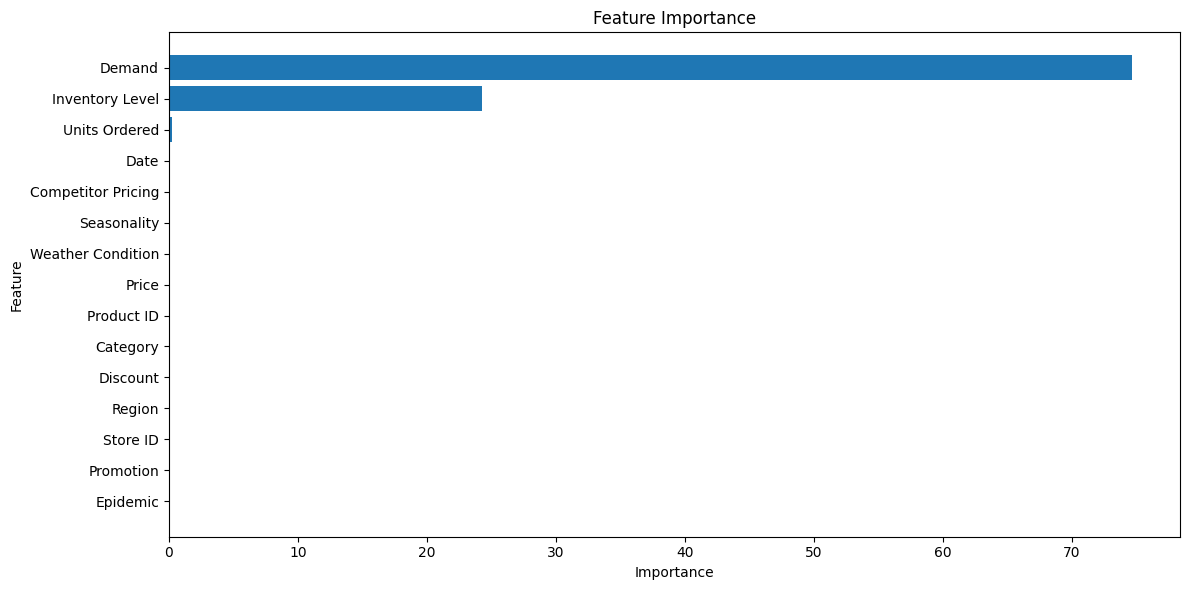

In [15]:
# Step 10: Feature Importance Visualization
importances = model.get_feature_importance(prettified=True)
print(importances)

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(importances['Feature Id'], importances['Importances'])
plt.gca().invert_yaxis()
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()